In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../week_01/all_penguins_clean.csv', index_col=0)

In [12]:
df.shape

(344, 14)

## 1. Imputation

In [20]:
df.isna().sum()

Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Real ID                 0
Sex                    10
dtype: int64

In [21]:
df.isna().sum().loc['Body Mass (g)']

2

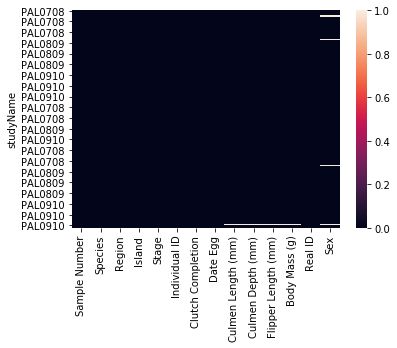

In [23]:
sns.heatmap(df.isna())

In [27]:
# fix categorical string value
#df['Sex_fixed'] = df['Sex'].fillna('MISSING') # creates new column
df['Sex'].fillna('MISSING', inplace=True)

In [35]:
med = df['Flipper Length (mm)'].median()
df['Flipper Length (mm)'].fillna(med, inplace=True)

Other ideas:

* insert medians by category (separate median for females/males) `df.groupby().transform()`
* forward / backward fill / interpolation (time series)
* K-Nearest Neighbors (finds the next most similar penguin)

### 2. Categories - One-Hot-Encoding

one categorical -> many binary columns

In [38]:
# dummy encoding ~ one-hot encoding
onehot = pd.get_dummies(df['Sex'])  # --> DF
onehot.head(3)

,.,FEMALE,MALE,MISSING
studyName,,,,
PAL0708,0,0,1,0
PAL0708,0,1,0,0
PAL0708,0,1,0,0


In [44]:
df2 = pd.concat([df, onehot], axis=1) # <-- concatenate columns
df2.head(3)
# pro tip: leave out 1 column, because it is redundant
del df2['.']

### 3. Binning

Scalar -> Category

In [47]:
df['Body Mass (g)'].fillna(3000.0, inplace=True)

In [58]:
# Quantilized binning: each bin has approx. the same #data points
q = pd.qcut(df['Body Mass (g)'], q=3)  # column, number of bins
q.head(3)

studyName
PAL0708    (3700.0, 4533.333]
PAL0708    (3700.0, 4533.333]
PAL0708    (2699.999, 3700.0]
Name: Body Mass (g), dtype: category
Categories (3, interval[float64]): [(2699.999, 3700.0] < (3700.0, 4533.333] < (4533.333, 6300.0]]

In [59]:
q.value_counts()

(2699.999, 3700.0]    119
(4533.333, 6300.0]    115
(3700.0, 4533.333]    110
Name: Body Mass (g), dtype: int64

In [51]:
df['weight_cat'] = pd.qcut(df['Body Mass (g)'], q=3, labels=['light', 'medium', 'heavy'])
df['weight_cat'].head(3)

studyName
PAL0708    medium
PAL0708    medium
PAL0708     light
Name: weight_cat, dtype: category
Categories (3, object): [light < medium < heavy]

In [52]:
# next step: one-hot encode -> 3 binary columns

alternatives:
    
* `pd.cut(...)` # bins of equal width
* set bin boundaries manually in pd.cut or pd.qcut 

Species
Adelie       AxesSubplot(0.125,0.125;0.775x0.755)
Chinstrap    AxesSubplot(0.125,0.125;0.775x0.755)
Gentoo       AxesSubplot(0.125,0.125;0.775x0.755)
Name: Body Mass (g), dtype: object

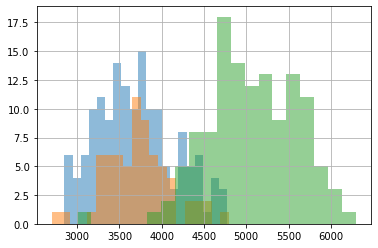

In [62]:
df.groupby('Species')['Body Mass (g)'].hist(bins=20, alpha=0.5)

### 4. Normalization

Change the range and/or distribution of values.

Examples:

* log-scale
* rescale to 0.0 .. 1.0
* rescale to a standard normal distribution

In [79]:
import math

In [80]:
mass = 3750.0
math.log(mass) # natural logarithm with base e=2.718...

8.229511118964457

In [82]:
math.exp(8.2295)

3749.9583041150954

In [67]:
# log-normalization

# useful when data stretches over many orders of magnitude
# when data is not normally distributed
# (usually done with countable things)
# does not work with negative values
df['log_mass'] = np.log(df['Body Mass (g)'])
df['log_mass'].head(3)

studyName
PAL0708    8.229511
PAL0708    8.242756
PAL0708    8.086410
Name: log_mass, dtype: float64

In [ ]:
# Min Max Scaling

# lightest penguin - 0.0
# heaviest penguin - 1.0

In [71]:
# 1) calculate the range
mass_range = df['Body Mass (g)'].max() - df['Body Mass (g)'].min()
mass_range

3600.0

In [73]:
df['mass_scaled'] = ( df['Body Mass (g)'] - df['Body Mass (g)'].min() ) / mass_range
df['mass_scaled'].head(3)

studyName
PAL0708    0.291667
PAL0708    0.305556
PAL0708    0.152778
Name: mass_scaled, dtype: float64

In [ ]:
# !! distribution does not change
# --> LogReg computation is more efficient

In [76]:
# also see: MinMaxScaler in scikit

**TODO: ** Link to 24 builtin functions